# Exploratory analysis of ADNI2 longitudinal data
* **Objectives:** 
    1. Characterize symptom severity trajectories based on clinical assessments
    2. Map structural features onto symptoms


* **Input modalities:**
    1. Coritcal thickness (CT)
    2. Hippocampal subfield volumes (HC) 


* **Clinical scales: ADAS-13, MMSE**

In [1]:
# Basic lib imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import collections
from scipy import stats
import seaborn as sns
import pickle
%matplotlib inline

/projects/nikhil/ADNI_prediction/code/conda_envs/adni-conda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/projects/nikhil/ADNI_prediction/code/conda_envs/adni-conda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Data imports
baseline_dir = '/projects/nikhil/ADNI_prediction/input_datasets/longitudinal_trajectories/'
#adnimerge_file = 'ADNIMERGE.csv'
hc_vol_file = '/input_csv/adni2-qcvols_nodups.csv'
CT_file = 'input_csv/ADNI2_subject_ROI_CT_dict_AAL.csv'
hc_data = pd.read_csv(baseline_dir + hc_vol_file)
ct_data = pd.read_csv(baseline_dir + CT_file)
#print ct_data.columns

In [77]:
#HC + CT Merge
in_data = pd.merge(hc_data, ct_data, on='ImageUID',how='inner')
#in_data.to_csv(baseline_dir + 'adni2-qcvols_nodups_aal_ct.csv'



In [80]:
# Extract subset of columns and subjects (cohort)
cohort = 'ADNI2'
#demographics
col_list_demo = ['PTID','ImageUID','AGE','PTGENDER','APOE4']
data_demo  = in_data[(in_data.ORIGPROT == cohort) & (in_data.HPC_QC!=0) & (in_data.VISCODE == 'bl')][col_list_demo]

#add a column with numerical DX mapping
in_data['DX_cat'] = in_data['DX'].replace(['MCI to NL', 'NL'], 0)
in_data['DX_cat'] = in_data['DX_cat'].replace(['NL to MCI', 'MCI', 'Dementia to MCI'], 1)
in_data['DX_cat'] = in_data['DX_cat'].replace(['NL to Dementia','MCI to Dementia', 'Dementia'], 2)
in_data['DX_cat'].values.astype(float)


# features / variables
clinical_feat = ['PTID','DX','DX_cat','ADAS13','MMSE']
hc_feat = ['L_CA1','L_subiculum','L_CA4DG','L_CA2CA3','L_stratum','L_Alv','L_Fimb','L_Fornix','L_Mam',
                 'R_CA1','R_subiculum','R_CA4DG','R_CA2CA3','R_stratum','R_Alv','R_Fimb','R_Fornix','R_Mam']
ct_feat = ['AAL_1', 'AAL_2', 'AAL_3','AAL_4', 'AAL_5', 'AAL_6', 'AAL_7', 'AAL_8', 'AAL_9', 'AAL_10',
                 'AAL_11', 'AAL_12', 'AAL_13', 'AAL_14', 'AAL_15', 'AAL_16', 'AAL_17', 'AAL_18', 'AAL_19', 'AAL_20', 
                 'AAL_21', 'AAL_22', 'AAL_23', 'AAL_24', 'AAL_25', 'AAL_26', 'AAL_27', 'AAL_28', 'AAL_29', 'AAL_30', 
                 'AAL_31', 'AAL_32', 'AAL_33', 'AAL_34', 'AAL_35', 'AAL_36', 'AAL_39', 'AAL_40', 'AAL_43', 'AAL_44', 
                 'AAL_45', 'AAL_46', 'AAL_47', 'AAL_48', 'AAL_49', 'AAL_50', 'AAL_51', 'AAL_52', 'AAL_53', 'AAL_54',
                 'AAL_55', 'AAL_56', 'AAL_57', 'AAL_58', 'AAL_59', 'AAL_60', 'AAL_61', 'AAL_62', 'AAL_63', 'AAL_64', 
                 'AAL_65', 'AAL_66', 'AAL_67', 'AAL_68', 'AAL_69', 'AAL_70', 'AAL_79', 'AAL_80', 'AAL_81', 'AAL_82',
                 'AAL_83', 'AAL_84', 'AAL_85', 'AAL_86', 'AAL_87', 'AAL_88', 'AAL_89', 'AAL_90']

col_list_feat = clinical_feat + hc_feat + ct_feat

data_bl  = in_data[(in_data.ORIGPROT == cohort) & (in_data.HPC_QC!=0) & (in_data.VISCODE == 'bl')][col_list_feat]
#data_bl = data_bl.drop_duplicates(subset='PTID', keep='first')
data_m03 = in_data[(in_data.ORIGPROT == cohort) & (in_data.HPC_QC!=0) & (in_data.VISCODE == 'm03')][col_list_feat]
#data_m03 = data_m03.drop_duplicates(subset='PTID', keep='first')
data_m06 = in_data[(in_data.ORIGPROT == cohort) & (in_data.HPC_QC!=0) & (in_data.VISCODE == 'm06')][col_list_feat]
#data_m06 = data_m06.drop_duplicates(subset='PTID', keep='first')
data_m12 = in_data[(in_data.ORIGPROT == cohort) & (in_data.HPC_QC!=0) & (in_data.VISCODE == 'm12')][col_list_feat]
#data_m12 = data_m12.drop_duplicates(subset='PTID', keep='first')
data_m24 = in_data[(in_data.ORIGPROT == cohort) & (in_data.HPC_QC!=0) & (in_data.VISCODE == 'm24')][col_list_feat]
#data_m24 = data_m24.drop_duplicates(subset='PTID', keep='first')
data_m36 = in_data[(in_data.ORIGPROT == cohort) & (in_data.HPC_QC!=0) & (in_data.VISCODE == 'm36')][col_list_feat]
data_m48 = in_data[(in_data.ORIGPROT == cohort) & (in_data.HPC_QC!=0) & (in_data.VISCODE == 'm48')][col_list_feat]

print 'number of subjects [BL,m03,m06,m12,m24]: {}'.format([len(data_bl.PTID.values),len(data_m03.PTID.values),
                                                            len(data_m06.PTID.values),len(data_m12.PTID.values),
                                                            len(data_m24.PTID.values)])

number of subjects [BL,m03,m06,m12,m24]: [654, 547, 482, 485, 337]


In [95]:
#Count MCI subjects
bl_ptid = in_data[(in_data.ORIGPROT == cohort) & (in_data.HPC_QC!=0) & (in_data.VISCODE == 'bl')& (in_data.DX_cat == 1)]['PTID'].values
m06_ptid = in_data[(in_data.ORIGPROT == cohort) & (in_data.VISCODE == 'm06')]['PTID'].values
m12_ptid = in_data[(in_data.ORIGPROT == cohort) & (in_data.VISCODE == 'm12')]['PTID'].values
m24_ptid = in_data[(in_data.ORIGPROT == cohort) & (in_data.VISCODE == 'm24')]['PTID'].values

print len(bl_ptid),len(m06_ptid),len(m12_ptid),len(m24_ptid)

print len(set(bl_ptid) & set(m06_ptid) & set(m12_ptid) & set(m24_ptid))

278 487 489 342
162


In [75]:
# number of HC subjects: [698, 698, 588, 520, 522, 371]
# number of CT subjects: [654, 654, 547, 482, 485, 337]
# number of HC_CT subjects: [654, 654, 547, 482, 485, 337]

#Rename Columns and Merge into 1 table 
bl=[]
m03=[]
m06=[]
m12=[]
m24=[]

for col in col_list_feat:
    if col == 'PTID':
        bl.append('PTID')
        #m03.append('PTID')
        m06.append('PTID')
        m12.append('PTID')
        m24.append('PTID')
    else:
        bl.append(col+'_bl')
        #m03.append(col+'_m03')
        m06.append(col+'_m06')
        m12.append(col+'_m12')
        m24.append(col+'_m24')
            
data_bl.columns= bl
#data_m03.columns=m03
data_m06.columns=m06
data_m12.columns=m12
data_m24.columns=m24
        
test_merge = pd.merge(data_demo, data_bl, on='PTID',how='inner')
print '# bl: {}'.format(len(test_merge))

# Select subject subsets based on Dx at baseline
#drop AD and/or CN 
test_merge = test_merge[test_merge.DX_cat_bl ==1]
print '# bl (AD & CN removed): {}'.format(len(test_merge))

#test_merge = pd.merge(test_merge, data_m03, on='PTID',how='inner')
#print len(test_merge)
test_merge = pd.merge(test_merge, data_m06, on='PTID',how='inner')
print '# 06: {}'.format(len(test_merge))
test_merge = pd.merge(test_merge, data_m12, on='PTID',how='inner')
print '# 12: {}'.format(len(test_merge))
test_merge = pd.merge(test_merge, data_m24, on='PTID',how='inner')
print '# 24: {}'.format(len(test_merge))

test_merge=test_merge.drop_duplicates(subset='PTID', keep='first')
print '# 24 (dups removed): {}'.format(len(test_merge))

test_merge.dropna(inplace=True)
print '# 24 (NANs removed): {}'.format(len(test_merge))

#add score diffs 
time_points = ['_m06','_m12','_m24']
for col in col_list_feat:
    for tp in time_points:
        if not col in ['PTID','DX']:
            val_diff = test_merge['{}{}'.format(col,tp)] - test_merge['{}_bl'.format(col)]
            test_merge['{}{}_diff'.format(col,tp)] = val_diff
            if col == 'ADAS13':
                test_merge['PointGain2{}'.format(tp)] = val_diff.values > 2
                test_merge['PointGain4{}'.format(tp)] = val_diff.values > 4
                test_merge['PointGain6{}'.format(tp)] = val_diff.values > 6
                test_merge['PointZero{}'.format(tp)] = val_diff.values > 0
                test_merge['PointLoss2{}'.format(tp)] = val_diff.values < -2
                test_merge['PointLoss4{}'.format(tp)] = val_diff.values < -4
                test_merge['PointLoss6{}'.format(tp)] = val_diff.values < -6
                test_merge['PointMod4{}'.format(tp)] = np.abs(val_diff.values) > 4                
            

print 'After _m06,_m12,_m24:'                
print '# 0+ PointGain: {},{},{}'.format(np.sum(test_merge['PointZero_m06'].values),np.sum(test_merge['PointZero_m12'].values), np.sum(test_merge['PointZero_m24'].values))
print '# 2+ PointGain: {},{},{}'.format(np.sum(test_merge['PointGain2_m06'].values), np.sum(test_merge['PointGain2_m12'].values), np.sum(test_merge['PointGain2_m24'].values))
print '# 4+ PointGain: {},{},{}'.format(np.sum(test_merge['PointGain4_m06'].values), np.sum(test_merge['PointGain4_m12'].values), np.sum(test_merge['PointGain4_m24'].values))
print '# 6+ PointGain: {},{},{}'.format(np.sum(test_merge['PointGain6_m06'].values), np.sum(test_merge['PointGain6_m12'].values), np.sum(test_merge['PointGain6_m24'].values))
print '# 2- PointLoss: {},{},{}'.format(np.sum(test_merge['PointLoss2_m06'].values), np.sum(test_merge['PointLoss2_m12'].values), np.sum(test_merge['PointLoss2_m24'].values))
print '# 4- PointLoss: {},{},{}'.format(np.sum(test_merge['PointLoss4_m06'].values), np.sum(test_merge['PointLoss4_m12'].values), np.sum(test_merge['PointLoss4_m24'].values))
print '# 6- PointLoss: {},{},{}'.format(np.sum(test_merge['PointLoss6_m06'].values), np.sum(test_merge['PointLoss6_m12'].values), np.sum(test_merge['PointLoss6_m24'].values))
print '# 4 Point abs change: {},{},{}'.format(np.sum(test_merge['PointMod4_m06'].values), np.sum(test_merge['PointMod4_m12'].values), np.sum(test_merge['PointMod4_m24'].values))

# bl: 654
# bl (AD & CN removed): 278
# 06: 237
# 12: 219
# 24: 161
# 24 (dups removed): 161
# 24 (NANs removed): 156
After _m06,_m12,_m24:
# 0+ PointGain: 67,66,78
# 2+ PointGain: 46,43,63
# 4+ PointGain: 21,23,41
# 6+ PointGain: 10,5,26
# 2- PointLoss: 42,50,40
# 4- PointLoss: 27,24,22
# 6- PointLoss: 12,13,10
# 4 Point abs change: 48,47,63


In [ ]:
np.set_printoptions(precision=3)
age = test_merge.AGE.values
sex = test_merge.PTGENDER.values
adas = test_merge.ADAS13_bl.values
apoe = test_merge.APOE4.values

print len(test_merge), len(age), np.mean(age),np.std(age), np.sum(sex=='Male'),np.sum(sex=='Female'), np.mean(adas),np.std(adas)

print np.sum(apoe==0),np.sum(apoe==1),np.sum(apoe==2), np.sum(apoe!=-1)

test_merge.columns

## Subject similarity based clustering 

* **Objective** 
    1. Group subjects toegther to identify individuals in congnitve decline from stable. 


* **Method: hierarchical clustering** 
    1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
    2. seaborn: http://seaborn.pydata.org/generated/seaborn.clustermap.html?highlight=clustermap#seaborn.clustermap


* **Similarity metric**
    1. Correlation between ADAS score timeseries ([BL, m06, m12, m18])
    
    
* **Things to consider**
    1. Number of clusters
    2. Effect of baseline Dx
    2. Effect of clustering parameters (linkage etc.) 


ValueError: Linkage 'Z' contains negative counts.

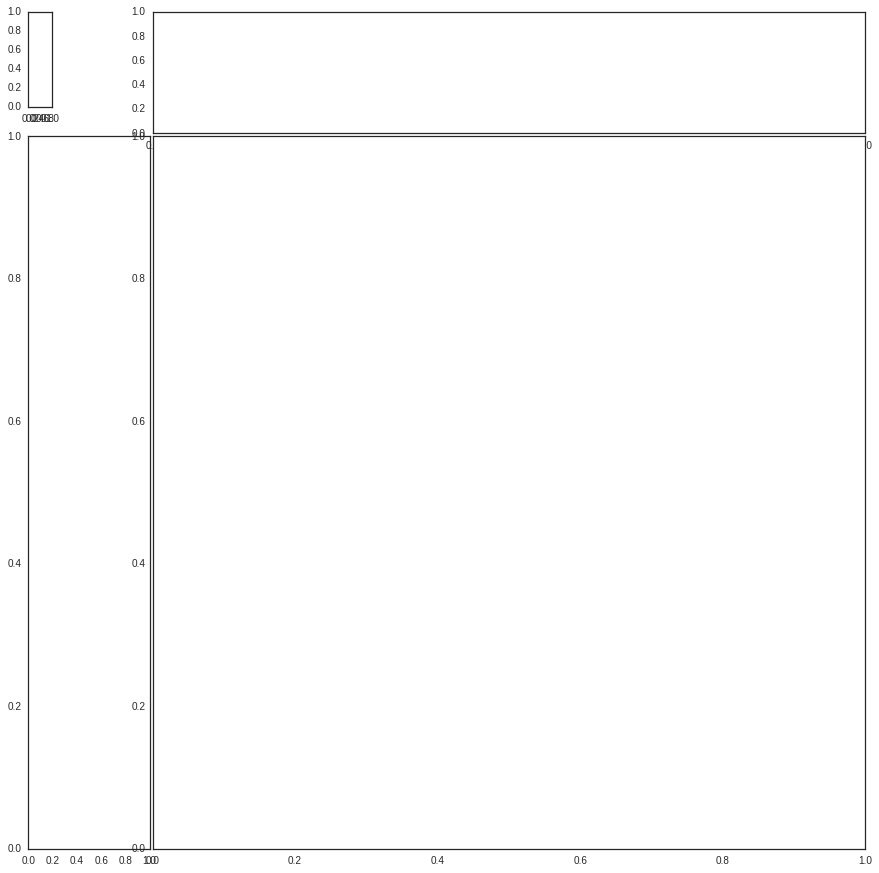

In [74]:
# Intersubject correlations
sns.set(style="white")
save_figure = True

CS_cols = ['ADAS13_bl','ADAS13_m06','ADAS13_m12','ADAS13_m24']
#CS_cols = ['MMSE_bl','MMSE_m06','MMSE_m12','MMSE_m24']

d = pd.DataFrame(data=np.transpose(test_merge[CS_cols].values),
                 index = CS_cols,
                 columns=test_merge['PTID'].values)

# Compute the correlation matrix
corr = d.corr()
#corr = corr.fillna(0) #NAN rise from subject with constant scores over all timepoints (for MMSE)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#sns.clustermap(data=corr, annot=True, cmap='Greens')
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)

g = sns.clustermap(corr, method='average', cmap=cmap, figsize=(15, 15),xticklabels=False,yticklabels=False)
#plt.xlabel('Hierarchical Clustering of MCI subject based on correlation of clinical score progression')


if save_figure:
    fig_name = 'hclust_MCI.jpg'
    g.savefig(baseline_dir + fig_name, format='jpeg', dpi=1000) 
    print 'saving fig at: {}'.format(baseline_dir + fig_name)


75 81 0 0
(156,) (4, 156)
saving fig at: /projects/nikhil/ADNI_prediction/input_datasets/longitudinal_trajectories/Traj_score_distribution.jpg


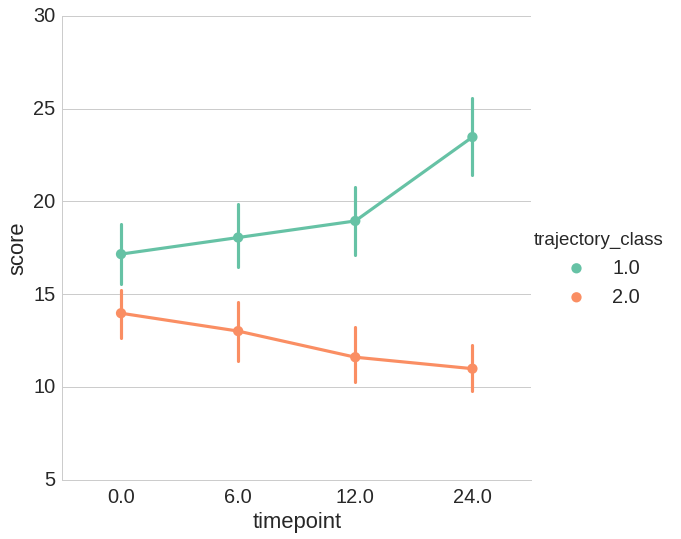

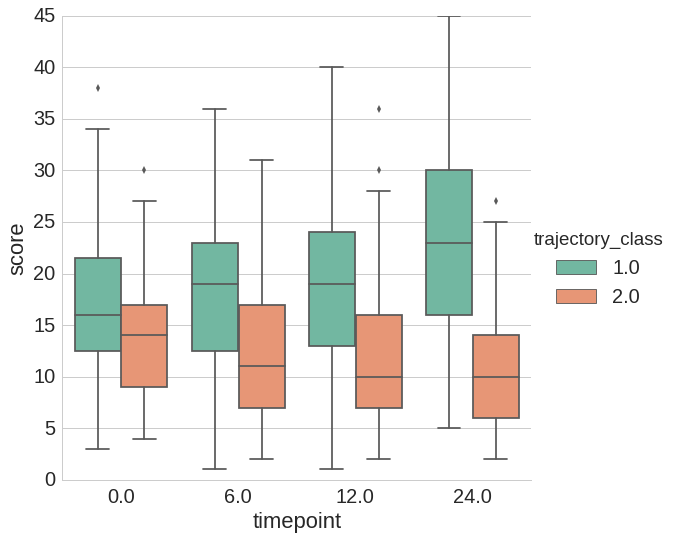

In [67]:
#Clip the dendrogram to get 2 clusters and the plot average scores per cluster
import scipy.cluster.hierarchy as sch
sns.set(font_scale=2) 
num_of_clusters = 2
Z = g.dendrogram_col.linkage
T = sch.fcluster(Z, num_of_clusters, 'maxclust')
print np.sum(T==1),np.sum(T==2), np.sum(T==3),np.sum(T==4)
print T.shape, d.values.shape

tpx, subx = d.values.shape
score_vec = d.transpose().values.reshape(tpx*subx,1)
tp_vec = np.tile([0,6,12,24],subx).reshape(tpx*subx,1)
T_tp = np.repeat(T,4, axis=0).reshape(tpx*subx,1)

df_traj = pd.DataFrame(data = np.hstack((score_vec,tp_vec,T_tp)), columns=['score','timepoint','trajectory_class'])

#plots
save_figure = True
sns.set_style("whitegrid")

g = sns.factorplot(x="timepoint", y='score', hue='trajectory_class', kind='point', palette='Set2',data=df_traj,size=8)
#plt.title('Mean score per time-point for each trajectory class')
g = sns.factorplot(x="timepoint", y='score', hue='trajectory_class', kind='box', palette='Set2', data=df_traj,size=8)
#plt.title('Score distibution per time-point for each trajectory class')

if save_figure:
    fig_name = 'Traj_score_distribution.jpg'
    g.savefig(baseline_dir + fig_name, format='jpeg', dpi=1000) 
    print 'saving fig at: {}'.format(baseline_dir + fig_name)

In [46]:
# Save subject - trajectry labels. 
#d.to_csv(baseline_dir+'input_csv/Longitduinal_MCI_ADAS13_traj_test.csv')

demo_df = test_merge[['PTID','PTGENDER','APOE4','ADAS13_bl','AGE']]
demo_df['traj'] = T
print len(demo_df)

for traj in [1,2]:
    sex = demo_df[demo_df.traj==traj].PTGENDER.values
    age = demo_df[demo_df.traj==traj].AGE.values
    apoe = demo_df[demo_df.traj==traj].APOE4.values
    adas = demo_df[demo_df.traj==traj].ADAS13_bl.values
    
    print np.sum(sex=='Male'),np.sum(sex=='Female'),np.mean(age), np.std(age),np.sum(apoe==0),np.sum(apoe==1),np.sum(apoe==2)
    print np.mean(adas), np.std(adas)

print 

#Statistical Significance
adas_T1 = demo_df[demo_df.traj==1].ADAS13_bl.values
adas_T2 = demo_df[demo_df.traj==2].ADAS13_bl.values

t_stat = stats.ttest_ind(adas_T1,adas_T2, equal_var = False)

print t_stat

278
82 74 70.9717948718 6.91494845701 72 65 19
15.5064102564 6.77523468689
12 9 75.7142857143 8.48944923416 4 12 5
28.1904761905 6.63051421994

Ttest_indResult(statistic=-8.031204912670745, pvalue=1.7936583167246467e-08)


/mnt/tigrlab/projects/nikhil/ADNI_prediction/code/conda_envs/adni-conda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


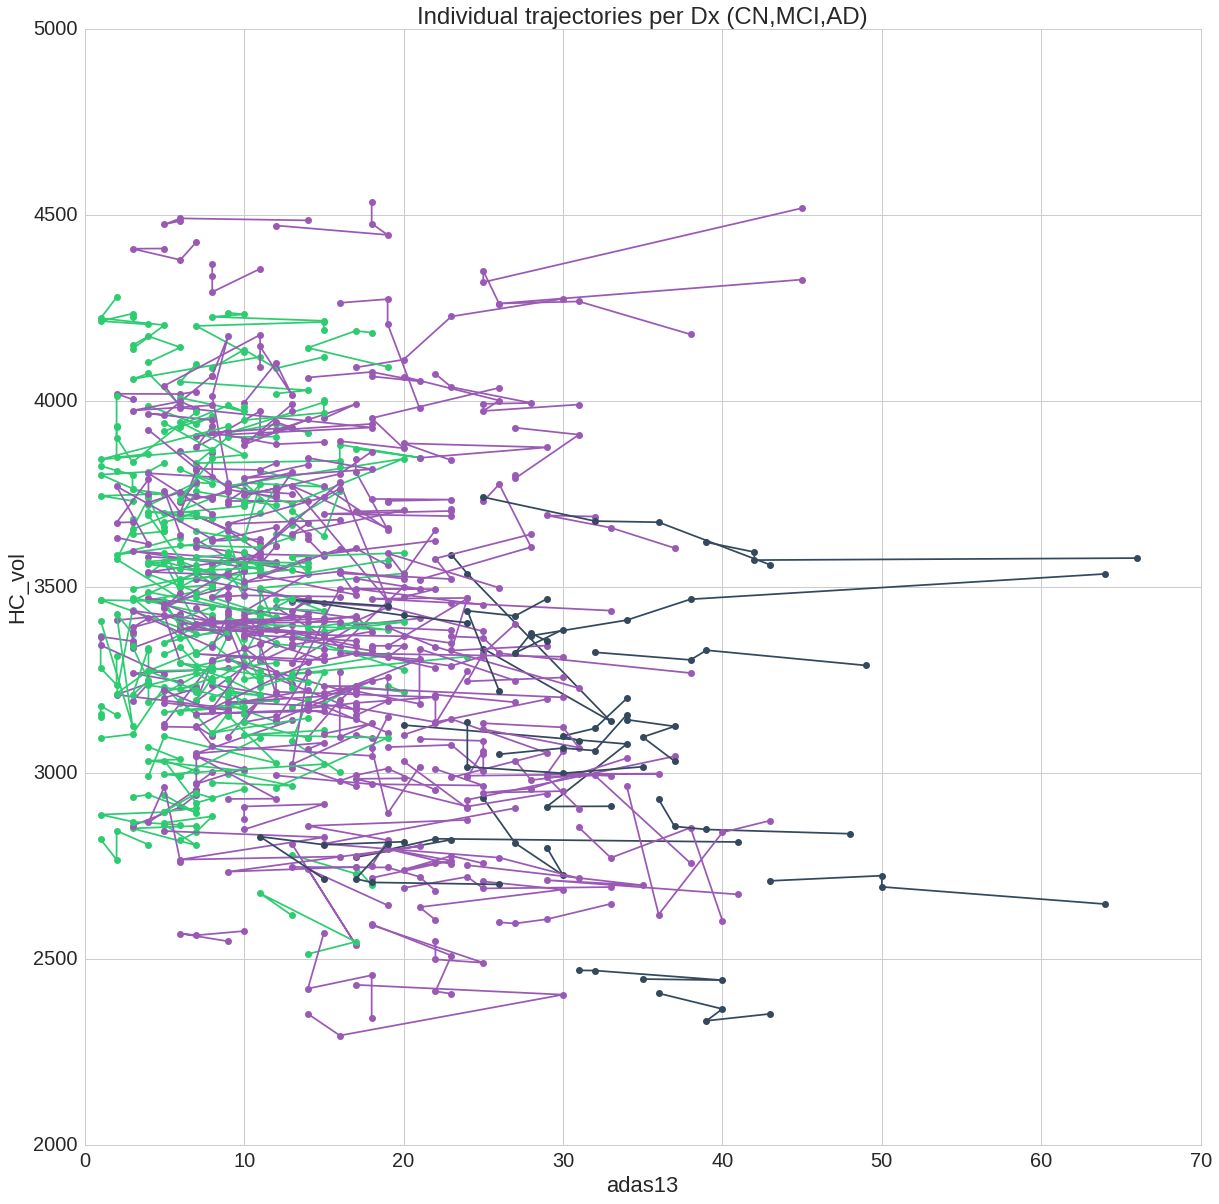

In [40]:
#plot individual trajectories
concat_df = pd.merge(demo_df, in_data[['PTID','VISCODE','DX','DX_cat','ADAS13','MMSE','AGE','PTGENDER','APOE4']+hc_feat],
                     on='PTID',how='inner')

concat_df.dropna(inplace=True)
print len(concat_df)

sns.set(font_scale=2) 
#sns.axes_style("whitegrid"):
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 20)

scores = test_merge[['ADAS13_bl','ADAS13_m06','ADAS13_m12','ADAS13_m24']].values

vol_list = []
mr_feat_list = ['CA1','subiculum','CA4DG','CA2CA3','stratum','Alv','Fimb','Fornix','Mam']
for mr_feat in mr_feat_list:
    L_vols = test_merge[['L_'+mr_feat+'_bl', 'L_'+mr_feat+'_m06', 'L_'+mr_feat+'_m12', 'L_'+mr_feat+'_m24']].values
    R_vols = test_merge[['R_'+mr_feat+'_bl', 'R_'+mr_feat+'_m06', 'R_'+mr_feat+'_m12', 'R_'+mr_feat+'_m24']].values
    vol_list.append(0.5*(L_vols+R_vols))
    
vols = np.sum(np.array(vol_list),axis=0)
T = test_merge.DX_cat_bl.values
my_colors = ["#2ecc71","#9b59b6","#34495e"]
for i in range(len(scores)):
    x = scores[i,:]
    y = vols[i,:]
    col_idx = int(T[i])
    plt.plot(x,y,'-o',c=my_colors[col_idx])
    
plt.xlabel('adas13')
plt.ylabel('HC_vol')
plt.title('Individual trajectories per Dx (CN,MCI,AD)')

## Feature clustering and correlations

* **Objectives** 
    1. Look at feature covariance / correlations  
    2. Look at correlation between symptoms and features over time


In [ ]:
# Compute the correlation matrix between features at baseline
mr_feat = []
for col in hc_feat + ct_feat:
    mr_feat.append(col+'_bl')

df = test_merge[mr_feat]
# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

# Draw the full plot
cg = sns.clustermap(df.corr(), linewidths=.5, figsize=(15, 15), cmap=cmap)
#plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

In [ ]:
#Feature - Score correlations over time
x = test_merge

feat_list = hc_feat #pick one: hc_feat or ct_feat
           
time_points_mr = ['_bl','_m06','_m12','_m24']
#time_points_cs = ['_m12','_m24']
time_points_cs = ['_m24','_m24','_m24','_m24']
corr_dict = {}
idx = 0
feat_grp_size = 9 #Esthetics - number of lines in the same plot. 
for f, feat in enumerate(feat_list):
    for tp_mr, tp_cs in zip(time_points_mr,time_points_cs):
        adas = test_merge['ADAS13'+tp_cs].values
        adas_clean = adas[np.isfinite(adas)]        
        y = test_merge[feat+tp_mr].values
        y = y[np.isfinite(adas)]
        adas_r = stats.pearsonr(y,adas_clean)[0]
        
        mmse = test_merge['MMSE'+tp_cs].values
        mmse_clean = mmse[np.isfinite(mmse)]        
        y = test_merge[feat+tp_mr].values
        y = y[np.isfinite(mmse)]
        mmse_r = stats.pearsonr(y,mmse_clean)[0]
        
        corr_dict[idx]={'structure':feat,'time-point':tp_mr,'adas_r':adas_r,'mmse_r':mmse_r,'feat_grp':f/feat_grp_size}
        idx += 1
    
df = pd.DataFrame.from_dict(corr_dict,orient='index')

sns.set_context("notebook", font_scale=1.25)
sns.set_style("ticks")
clinical_scale = 'adas_r'
if len(feat_list) == 18: #hc_feat
    g = sns.factorplot(x="time-point", y=clinical_scale, hue='structure', col='feat_grp', col_wrap=2,
                       markers=['o', 'd', 's','+', '^', '>', 'v', '<','x','o', 'd', 's','+', '^', '>', 'v', '<','x'],
                       data=df, size=5)
else: 
    g = sns.factorplot(x="time-point", y=clinical_scale, hue='structure', col='feat_grp', col_wrap=3, data=df, size=4)
g.despine(left=True)

#plt.title('Correlation between structural measure vs. clinical scores')
    

**Other exploratory analysis - in progress** 

In [ ]:
plt.rcParams['figure.figsize'] = (30, 40)
font_size = 10
from scipy.stats import ttest_ind

univar_measures = ['AGE','ADAS13_bl'] 
for feat in hc_feat:
    univar_measures.append(feat + '_bl')
    
cols = 6
rows = np.ceil(float(len(univar_measures))/cols)

for u, univar in enumerate(univar_measures):
    if univar in ['APOE4','PTGENDER']:
        univar_measure_cat = np.transpose(test_merge[univar].values)
    else:
        univar_measure_cat = np.transpose(test_merge[univar].values)
        
    dx_traj = np.transpose(np.vstack((univar_measure_cat, T)))
    dx_traj_df = pd.DataFrame(data=dx_traj, columns=[univar,'Traj'])
    
    
    if univar not in ['APOE4','PTGENDER']:
        cat1 = test_merge[univar].values[T==1]
        cat2 = test_merge[univar].values[T==2]

        print 'univar: {}, t_val:{:4.3f}, p_val:{:4.3f}'.format(univar, ttest_ind(cat1,cat2)[0],ttest_ind(cat1,cat2)[1])

        
    plt.subplot(rows,cols,u+1)
    sns.barplot(y=univar, x='Traj', data=dx_traj_df)
    title_obj = plt.title('t_val:{:4.3f}, p_val:{:4.3f}'.format(ttest_ind(cat1,cat2)[0],ttest_ind(cat1,cat2)[1]),fontsize=font_size)
    if ttest_ind(cat1,cat2)[1] < 0.05:        
        plt.getp(title_obj)                    #print out the properties of title
        plt.getp(title_obj, 'text')            #print out the 'text' property for title
        plt.setp(title_obj, color='r')         #set the color of title to red
        
    plt.ylabel(univar, fontsize=font_size)
    plt.xlabel('Traj_class', fontsize=font_size)
    

In [ ]:
# # Save test_merge
# test_merge['Traj'] = T-1
# test_merge.to_csv(baseline_dir+'input_csv/Longitduinal_HC_CT_data_MCI_traj.csv')
# print T.shape, d.values.shape
# print np.min(d.values[3][T==1]), np.max(d.values[3][T==1])
# print np.min(d.values[3][T==2]), np.max(d.values[3][T==2])



In [ ]:
# plotting stats
plt.rcParams['figure.figsize'] = (15, 20)
font_small = 8
font_med = 16
font_large = 24
# pick variable(s) i.e. columns and rows with no NaN values 
clinical_var = col_list_feat
time_points = ['_m06','_m12','_m24']
subplot_idx = 0
for row, c_var in enumerate(clinical_var):
    if not c_var in ['PTID','DX']:
        for col, time_point in enumerate(time_points):
            subplot_idx += 1
            plt.subplot(len(clinical_var), len(time_points), subplot_idx)
            x = test_merge[c_var + time_point] - test_merge[c_var + '_bl']
            print 'total number of subjects: {}'.format(len(x.values))
            x = x[np.isfinite(x)]
            print 'total number of subjects without NaNs: {}'.format(len(x.values))
            sns.distplot(x, kde=False, rug=True)
            plt.xlabel('{} - score_bl'.format(c_var + time_point), fontsize=font_med)
            title_str = 'N={}, mean: {:3.2f}, std: {:3.2f}'.format(len(x.values), np.mean(x),np.std(x))
            plt.title(title_str)

In [ ]:
# Draw a stratified Cognititive decline plot per Dx
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
clinical_var = col_list_feat
time_points = ['_m06','_m12','_m24']
i=0
for c_var in clinical_var:
    if not c_var in ['PTID','DX','DX_cat']:
        for tp in time_points:
            i+=1
            col = c_var + tp + '_diff'
            #plt.subplot(2,3,i)
            g = sns.factorplot(x="DX_cat_bl", y=col, data=test_merge, size=6, kind="bar", palette="muted")
            #g.despine(left=True)
            g.set_ylabels(col, fontsize = font_large)

            print 'population mean: {}, std: {}'.format(np.mean(test_merge[col]),np.std(test_merge[col]))

In [ ]:
clinical_var = ['ADAS13','MMSE','DX_cat']
for i, c_var in enumerate(clinical_var):
    traj = [test_merge[c_var + '_bl'], test_merge[c_var + '_m06'], 
            test_merge[c_var + '_m12'], test_merge[c_var + '_m24']]
    traj = np.array(traj)
    t = test_merge['AGE']
    t = np.vstack((t,t+0.5,t+1,t+2))
    plt.subplot(3,1,i+1)
    for j in np.arange(t.shape[1]):        
        plt.plot(t[:,j],traj[:,j],'.-')
    plt.xlabel('AGE')
    plt.ylabel(c_var)
    
    

In [ ]:
from sklearn.preprocessing import scale
dim_reduct = 'both'

mr_feat = []
cl_feat = [] 
for f in hc_feat:
    mr_feat.append(test_merge[f+'_bl'].values)
    #mr_feat.append(test_merge[f+'_m24_diff'].values)


mr_feat = np.transpose(np.array(mr_feat))
print 'mr_feat_shape: {}'.format(mr_feat.shape)

cl_feat.append(test_merge['ADAS13_bl'].values)
#cl_feat.append(test_merge['ADAS13_m24_diff'].values)

#cl_feat.append(test_merge['AGE'].values)
#l_feat.append(test_merge['APOE4'].values)
#cl_feat.append(test_merge['DX_cat_bl'].values)
#cl_feat.append(test_merge['ADAS13_m24_diff'].values) 

cl_feat = np.transpose(np.array(cl_feat))
print 'cl_feat_shape: {}'.format(cl_feat.shape)

feat = np.hstack((mr_feat,cl_feat))
print 'feat_shape: {}'.format(feat.shape)
filtered_idx = ~np.isnan(feat).any(axis=1)
feat = feat[filtered_idx]
print 'feat_shape: {}'.format(feat.shape)
print np.mean(feat), np.std(feat)
feat = scale(feat)
print np.mean(feat), np.std(feat)

feat_X = feat[:,:feat.shape[1]-1]
print feat_X.shape

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

traj = test_merge['PointMod4'].values[filtered_idx]

if dim_reduct == 'pca':
    model = PCA(n_components=10)
    embeddings = model.fit_transform(feat_X) 
    print model.explained_variance_ratio_
    df = pd.DataFrame({'pc_1':embeddings[:,0],'pc_2':embeddings[:,1], 'traj':traj})
    sns.lmplot('pc_1', 'pc_2', data=df, fit_reg=False,hue="traj", scatter_kws={"marker": "D", "s": 25}, size=8)
elif dim_reduct == 'tsne':
    model = TSNE(n_components=2, random_state=0, init='pca')
    embeddings = model.fit_transform(feat_X) 
    df = pd.DataFrame({'tsne_1':embeddings[:,0],'tsne_2':embeddings[:,1], 'traj':traj})
    sns.lmplot('tsne_1', 'tsne_2', data=df, fit_reg=False,hue="traj", scatter_kws={"marker": "D", "s": 25}, size=8)
elif dim_reduct == 'both':
    model = PCA(n_components=10)
    pca_embeddings = model.fit_transform(feat_X) 
    print model.explained_variance_ratio_    
    model = TSNE(n_components=2, random_state=0, init='pca')
    tsne_embeddings = model.fit_transform(feat_X) 
    df = pd.DataFrame({'pc_1':pca_embeddings[:,0],'pc_2':pca_embeddings[:,1], 
                       'tsne_1':tsne_embeddings[:,0],'tsne_2':tsne_embeddings[:,1], 'traj':traj})
    sns.lmplot('pc_1', 'pc_2', data=df, fit_reg=False,hue="traj", scatter_kws={"marker": "D", "s": 25}, size=5)
    sns.lmplot('tsne_1', 'tsne_2', data=df, fit_reg=False,hue="traj", scatter_kws={"marker": "D", "s": 25}, size=5)
else:
    print 'unknown dim_reduct technique'


In [ ]:
clinical_var = ['MMSE','ADAS13']
time_points = ['_m06','_m12','_m24']

for c_var in clinical_var:
    for tp in time_points:
        g = sns.PairGrid(test_merge, y_vars=c_var + tp + "_diff",
                         x_vars=["AGE_median_split","PTGENDER", "APOE4", 'DX_cat_bl'],
                         size=5, aspect=.5)

        # Draw a seaborn pointplot onto each Axes
        g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])    
        if c_var =='MMSE':
            g.set(ylim=(-6, 0.5))            
        else:
            g.set(ylim=(-4, 14))
        sns.despine(fig=g.fig, left=True)
        

In [ ]:
#ADNI1 vs. ADNI2 common PTIDs
# baseline_dir = '/projects/nikhil/ADNI_prediction/input_datasets/longitudinal_trajectories/'
# adnimerge_file = 'input_csv/ADNIMERGE.csv'
# adnimerge_df = pd.read_csv(baseline_dir + adnimerge_file)
# adni1_ptids = adnimerge_df[adnimerge_df.ORIGPROT == 'ADNI1']['PTID'].values
# adni2_ptids = adnimerge_df[adnimerge_df.ORIGPROT == 'ADNI2']['PTID'].values
#Load from pkls
baseline_dir = '/projects/nikhil/ADNI_prediction/input_datasets/'
ADNI1_data_path = baseline_dir + 'CS/ADNI1_BL_PTID_ADAS13_dict.pkl'
ADNI2_data_path = baseline_dir + 'CS/ADNI2_BL_PTID_ADAS13_dict.pkl'

adni1_ptids = pickle.load( open(ADNI1_data_path, "rb" ) ).keys()
adni2_ptids = pickle.load( open(ADNI2_data_path, "rb" ) ).keys()

#print len(adni1_ptids)
#print len(adni2_ptids)

adni1_sub_idx = []
adni2_sub_idx = []
for i in list(adni1_ptids):
    adni1_sub_idx.append(i.split('_')[0])
for i in list(adni2_ptids):
    adni2_sub_idx.append(i.split('_')[0])

#print adni1_sub_idx, adni2_sub_idx
# adni1_and_2_common_subs = set(adni1_sub_idx).intersection(adni2_sub_idx)
# print adni1_and_2_common_subs
# print len(adni1_and_2_common_subs)